In [ ]:
%pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from ucimlrepo import fetch_ucirepo
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

In [ ]:
# fetch dataset
dry_bean_dataset = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

# metadata
print(dry_bean_dataset.metadata)

# variable information
print(dry_bean_dataset.variables)

{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [ ]:
# merge data and targets
df = pd.concat([X, y], axis=1)
df.head(9)

# output data to excel file using openpyxl
df.to_excel('dry_bean.xlsx', engine='openpyxl')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# summary statistics
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
# calculate the variance of each feature excluding the target
variance = df.iloc[:, :-1].var()
variance

Area               8.599026e+08
Perimeter          4.592007e+04
MajorAxisLength    7.343494e+03
MinorAxisLength    2.022309e+03
AspectRatio        6.085026e-02
Eccentricity       8.464324e-03
ConvexArea         8.865456e+08
EquivDiameter      3.501932e+03
Extent             2.409471e-03
Solidity           2.171913e-05
Roundness          3.542617e-03
Compactness        3.808552e-03
ShapeFactor1       1.272380e-06
ShapeFactor2       3.550668e-07
ShapeFactor3       9.800238e-03
ShapeFactor4       1.906595e-05
dtype: float64

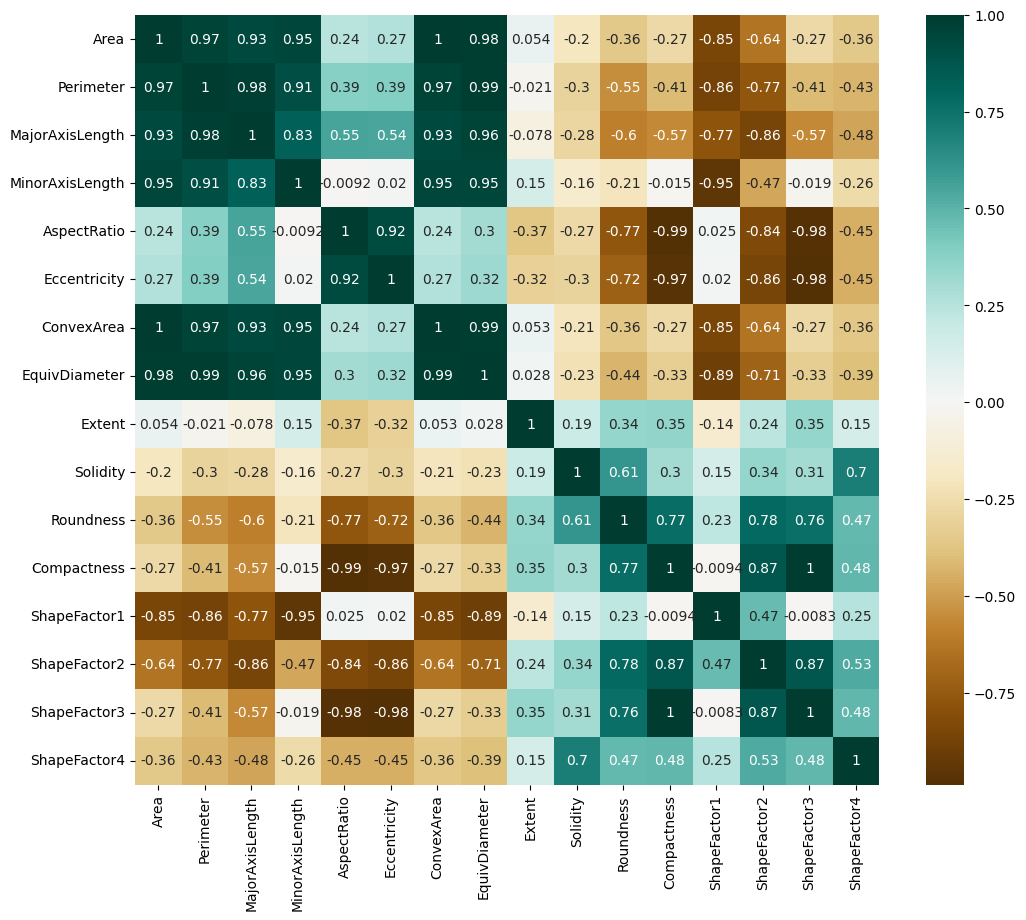

In [ ]:
# draw correlation matrix
corr = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='BrBG')
plt.show()

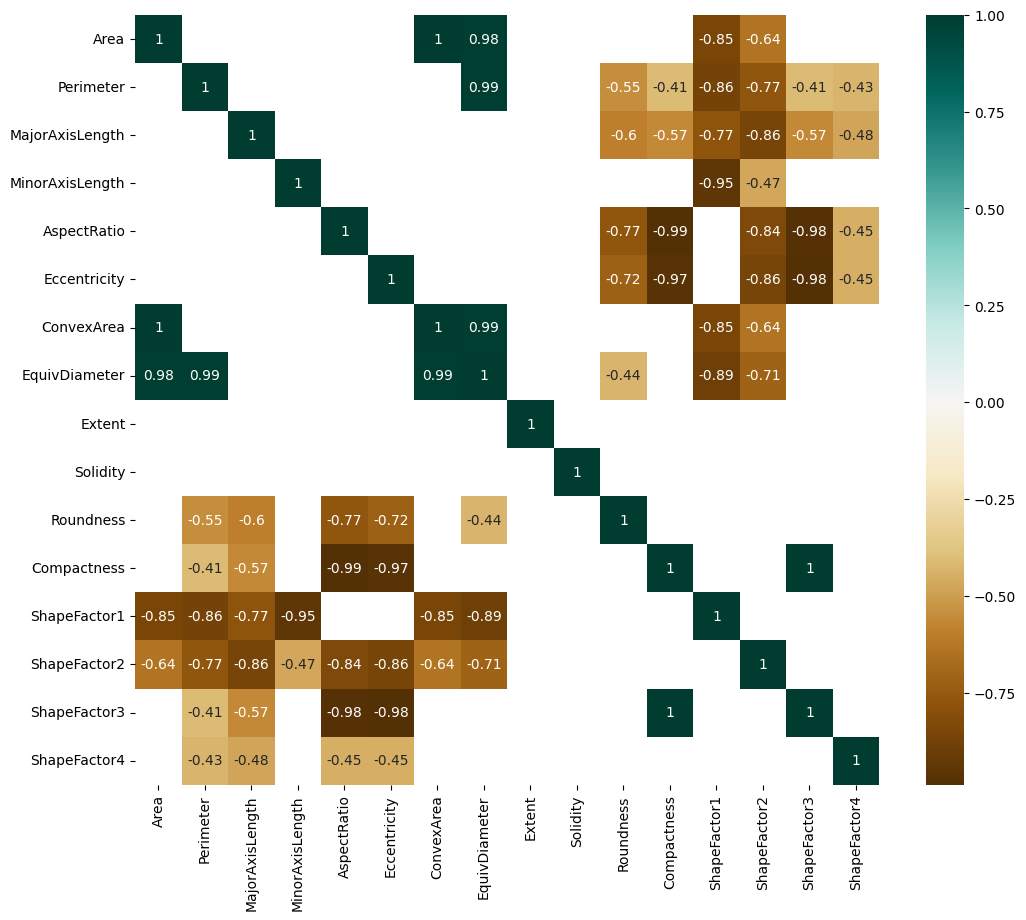

In [ ]:
# show only the correlation of features with correlation > 0.5
corr = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.98) | (corr <= -0.4)], annot=True, cmap='BrBG')
plt.show()

In [ ]:
# show couple of features with high correlation coefficient (>= 0.4), and their correlation coefficient,
# don't show NaN, no diagonal elements
# draw a table of the correlation coefficient of the features with high correlation coefficient (>= 0.4)
corr = X.corr()
corr = corr[(corr >= 0.4) | (corr <= -0.4)]
corr = corr[corr != 1.0]
corr = corr.dropna(axis=1, how='all')
corr = corr.dropna(axis=0, how='all')
corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,NaN,0.966722,0.931834,0.951602,NaN,NaN,0.999939,0.984968,NaN,NaN,NaN,-0.847958,-0.639291,NaN,NaN
Perimeter,0.966722,NaN,0.977338,0.913179,NaN,NaN,0.967689,0.991380,NaN,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,NaN,0.826052,0.550335,0.541972,0.932607,0.961733,NaN,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,NaN,NaN,NaN,0.951339,0.948539,NaN,NaN,NaN,-0.947204,-0.471347,NaN,NaN
AspectRatio,NaN,NaN,0.550335,NaN,NaN,0.924293,NaN,NaN,NaN,-0.766979,-0.987687,NaN,-0.837841,-0.978592,-0.449264
Eccentricity,NaN,NaN,0.541972,NaN,0.924293,NaN,NaN,NaN,NaN,-0.722272,-0.970313,NaN,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,NaN,NaN,NaN,0.985226,NaN,NaN,NaN,-0.847950,-0.640862,NaN,NaN
EquivDiameter,0.984968,0.991380,0.961733,0.948539,NaN,NaN,0.985226,NaN,NaN,-0.435945,NaN,-0.892741,-0.713069,NaN,NaN
Solidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607150,NaN,NaN,NaN,NaN,0.702163
Roundness,NaN,-0.547647,-0.596358,NaN,-0.766979,-0.722272,NaN,-0.435945,0.607150,NaN,0.768086,NaN,0.782824,0.763126,0.472149


from matplotlib import pyplot as plt
corr['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['Perimeter'].plot(kind='hist', bins=20, title='Perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['MajorAxisLength'].plot(kind='hist', bins=20, title='MajorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['MinorAxisLength'].plot(kind='hist', bins=20, title='MinorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='Area', y='Perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='Perimeter', y='MajorAxisLength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='MajorAxisLength', y='MinorAxisLength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='MinorAxisLength', y='AspectRatio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['Perimeter'].plot(kind='line', figsize=(8, 4), title='Perimeter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['MajorAxisLength'].plot(kind='line', figsize=(8, 4), title='MajorAxisLength')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['MinorAxisLength'].plot(kind='line', figsize=(8, 4), title='MinorAxisLength')
plt.gca().spines[['top', 'right']].set_visible(False)

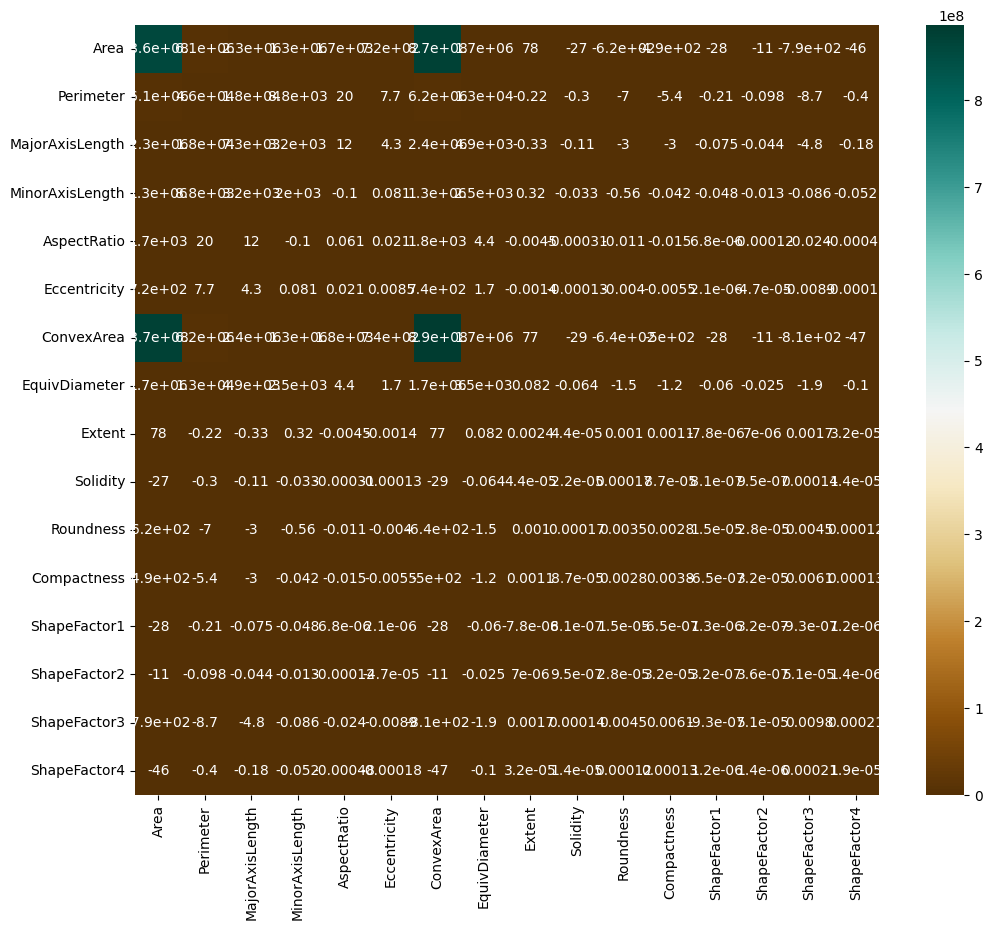

In [ ]:
# draw covariance matrix
cov = X.cov()
plt.figure(figsize=(12, 10))
sns.heatmap(cov, annot=True, cmap='BrBG')
plt.show()

In [ ]:
# apply pca
pca = PCA(n_components=2)
pca.fit(X)
df_pca = pca.transform(X)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca


,PC1,PC2
0,-35149.923738,-22.086841
1,-34586.321890,58.586565
2,-33764.026291,-38.995373
3,-32586.564121,239.179424
4,-32712.806082,-71.439790
...,...,...
13606,-15707.436349,-99.766954
13607,-15714.623851,-112.800721
13608,-15634.515179,-87.239053
13609,-15559.055018,-24.031005


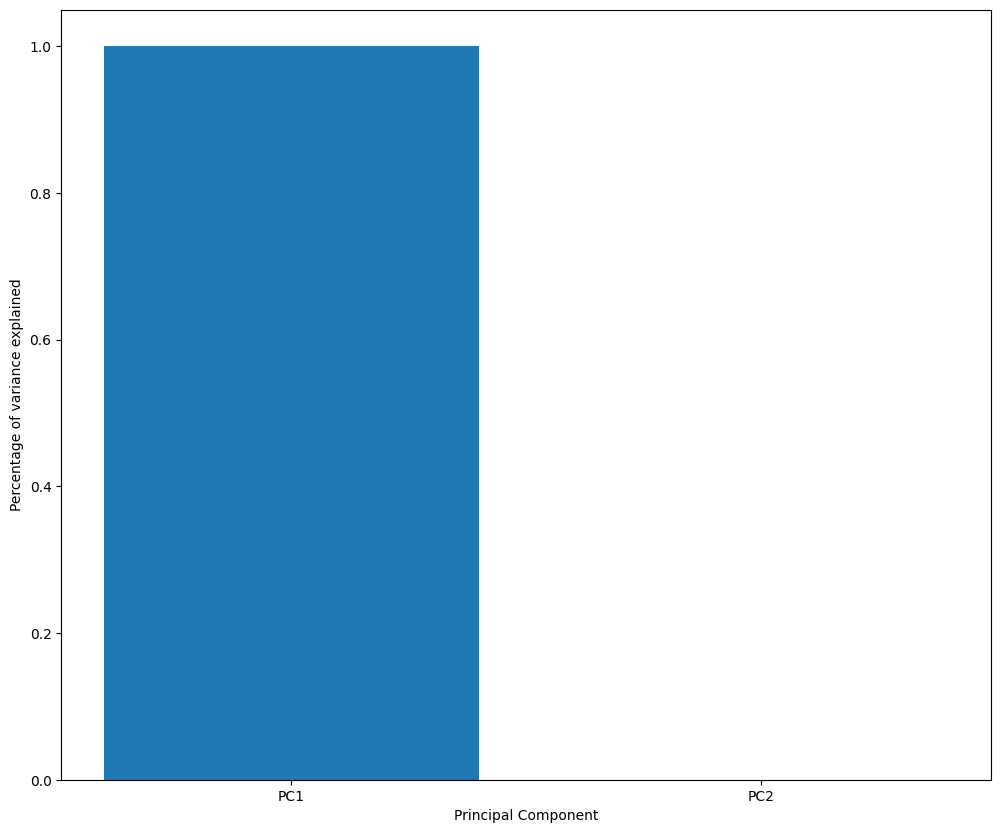

[9.99967207e-01 3.06176794e-05]


In [ ]:
# plot pca
plt.figure(figsize=(12, 10))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.show()

print(pca.explained_variance_ratio_)

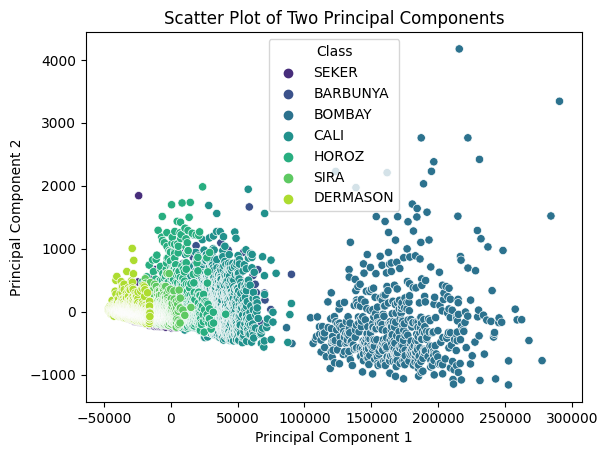

In [ ]:
df = pd.DataFrame(data=np.c_[df_pca, y], columns=['Principal Component 1', 'Principal Component 2', 'Class'])

# Scatter plot with different colors for each class
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Class', data=df, palette='viridis')
plt.title('Scatter Plot of Two Principal Components')
plt.show()


In [ ]:
# total variation in the data is explained by the first two principal components
pca.explained_variance_ratio_.sum()

0.9999978243949357

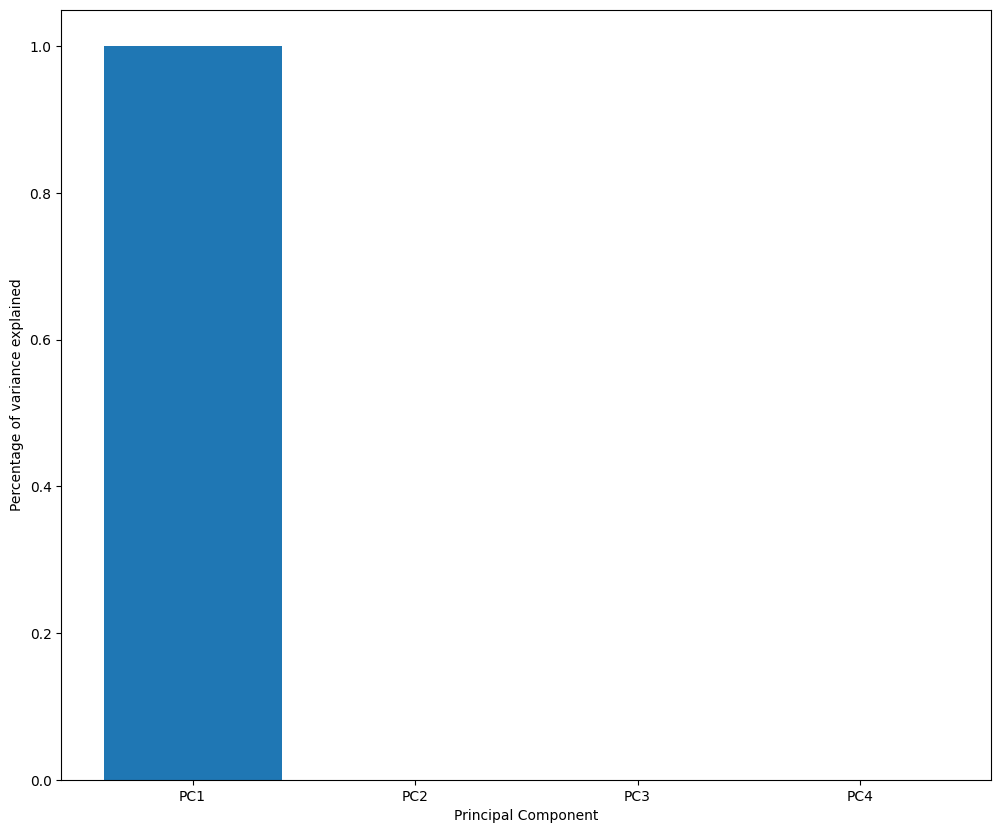

array([9.99967207e-01, 3.06176794e-05, 1.92111562e-06, 2.29430254e-07])

In [ ]:
# increase the number of principal components to 4
# plot the total variance explained by the first 4 principal components
pca = PCA(n_components=4)
pca.fit(X)
df_pca = pca.transform(X)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca

# plot the total variance explained by the first 4 principal components
plt.figure(figsize=(12, 10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.show()

pca.explained_variance_ratio_

In [ ]:
# sum of the variance explained by the first 2 principal components
pca.explained_variance_ratio_[:2].sum()

0.9999978243949357

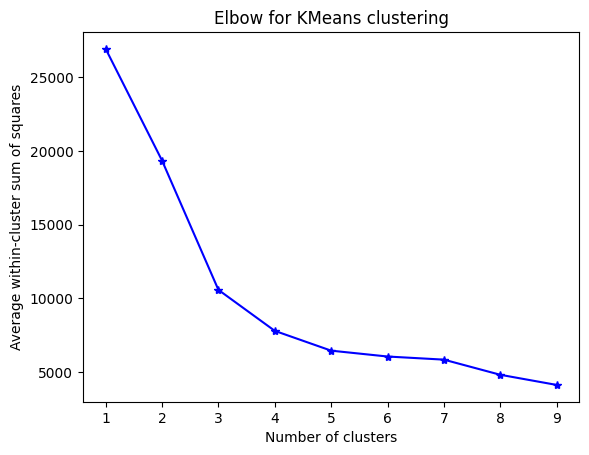

In [ ]:
# create and plot multiple k-means models and plot
# find the optimal number of clusters
kMeans_models = [KMeans(n_clusters=k, n_init=1).fit(X) for k in range(1, 10)]
centroids = [model.cluster_centers_ for model in kMeans_models]

from scipy.spatial.distance import cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

plt.plot(range(1, 10), avgWithinSS, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

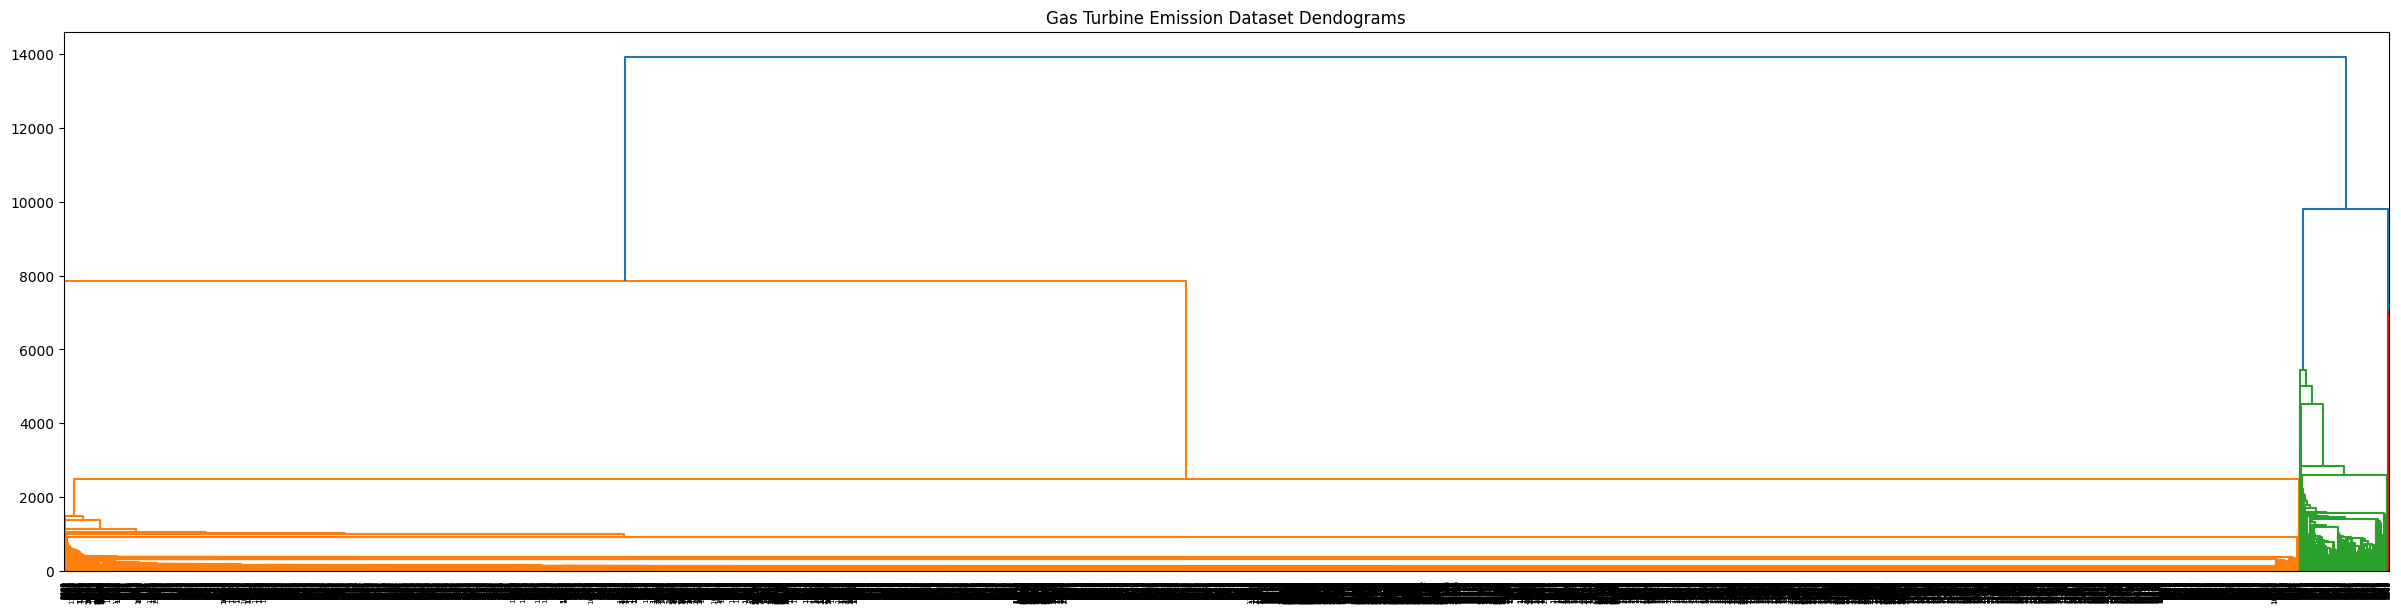

In [ ]:
# apply ahc
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
cluster.fit_predict(X)

# plot the dendrogram
plt.figure(figsize=(30, 7))
plt.title("Gas Turbine Emission Dataset Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.show()

In [ ]:
kmeans = []
silhouette = []
dunn = []
davis_bouldin = []
for i in range(2, 10):
    k = KMeans(n_clusters=i, n_init="auto")
    k.fit(X)
    kmeans.append(k)
    silhouette.append(metrics.silhouette_score(X, k.labels_, metric='euclidean'))
    davis_bouldin.append(metrics.davies_bouldin_score(X, k.labels_))

# plt.plot(range(2, 10), dunn, 'b*-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Dunn Score')
# plt.title('Dunn for KMeans clustering')
# plt.show()

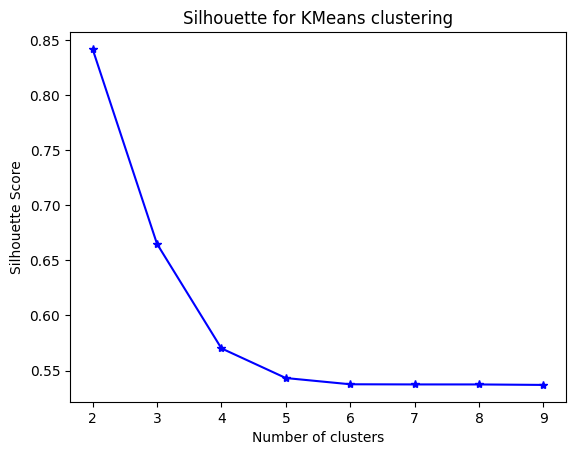

In [ ]:
plt.plot(range(2, 10), silhouette, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for KMeans clustering')
plt.show()

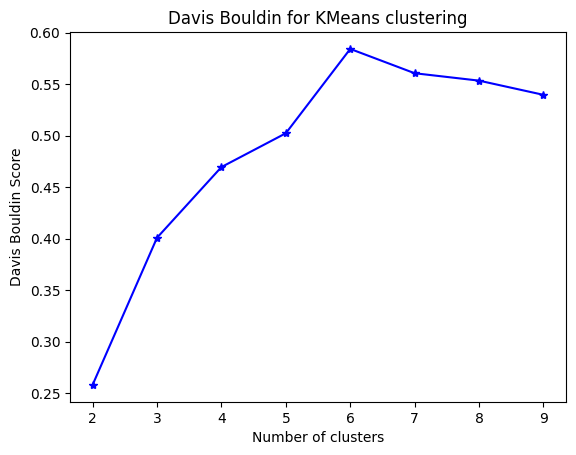

In [ ]:
plt.plot(range(2, 10), davis_bouldin, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Davis Bouldin Score')
plt.title('Davis Bouldin for KMeans clustering')
plt.show()

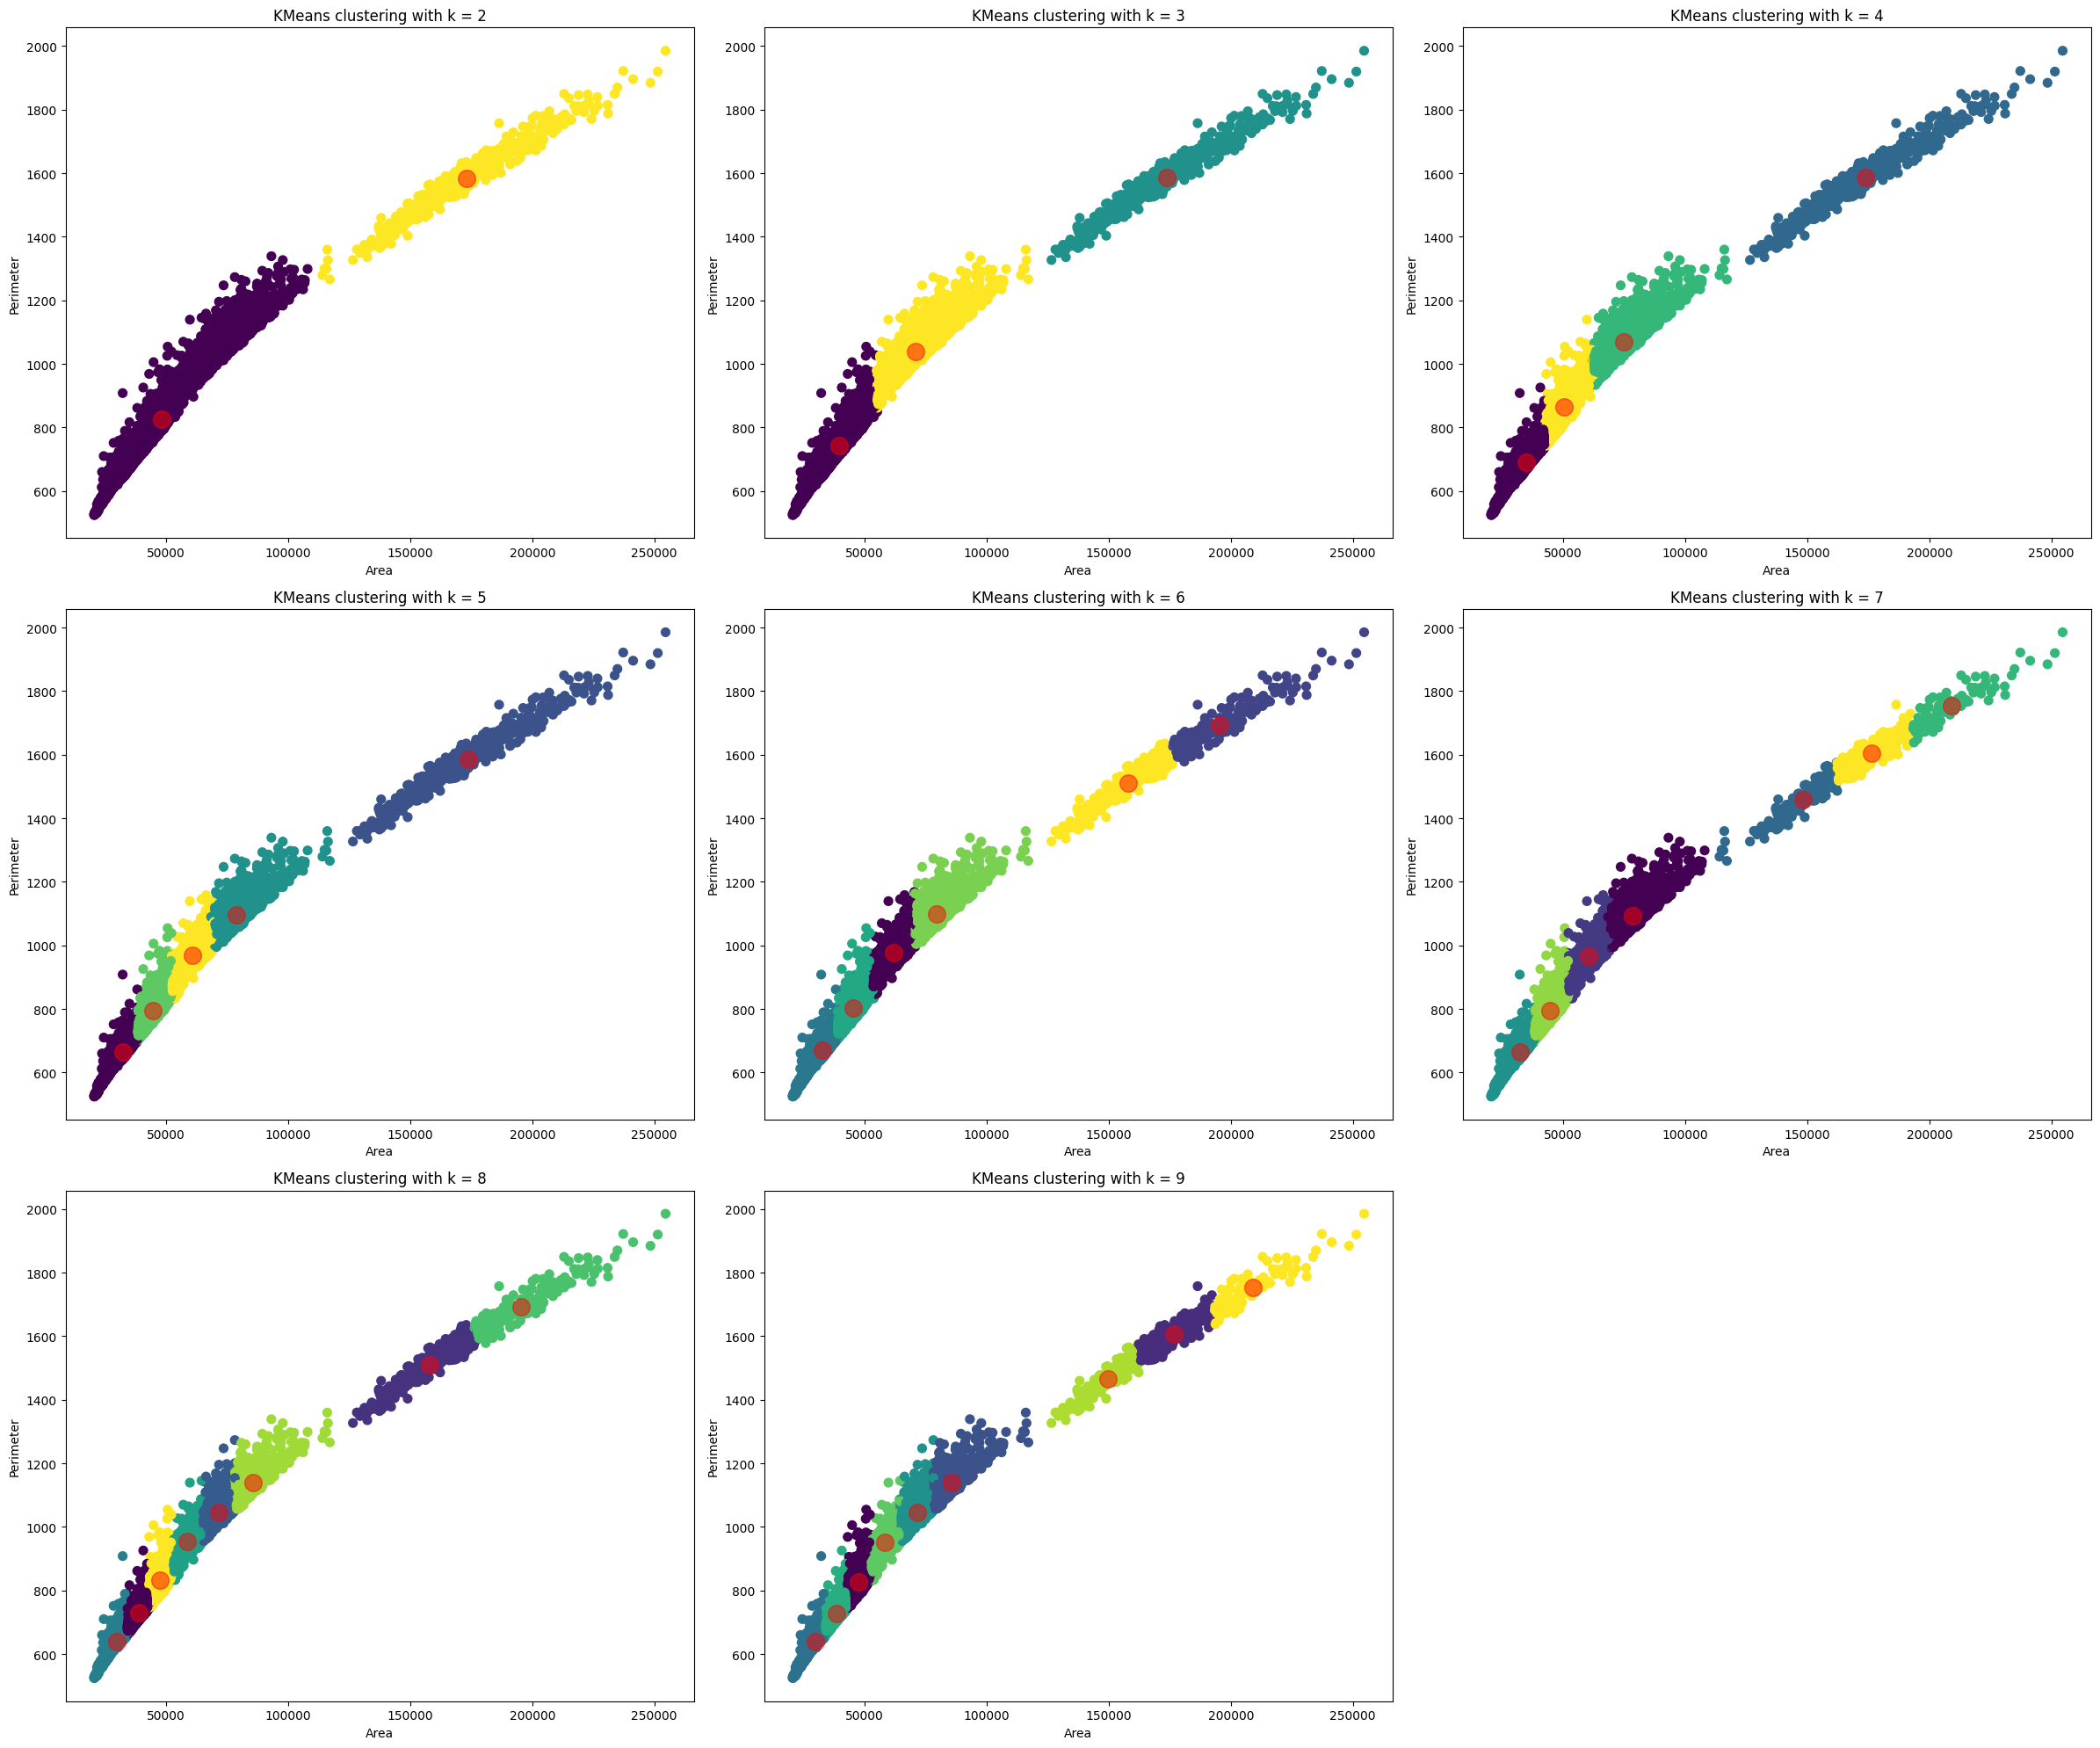

In [ ]:
plt.figure(figsize=((24, 20)))
for i in range(len(kmeans)):
    plt.subplot(3, 3, i+1)
    plt.scatter(X["Area"], X["Perimeter"], c=kmeans[i].predict(X), s=50, cmap='viridis')
    centers = kmeans[i].cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.xlabel('Area')
    plt.ylabel('Perimeter')
    plt.title('KMeans clustering with k = ' + str(i+2))
    plt.tight_layout()
plt.show()

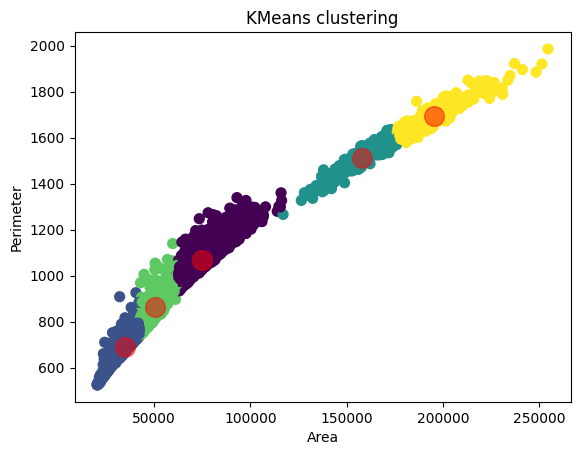

In [ ]:
# create and plot multiple k-means models and plot
# visualize the result
kmeans = KMeans(n_clusters=5, n_init=1)
kmeans.fit(X)

plt.scatter(X["Area"], X["Perimeter"], c=kmeans.predict(X), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('KMeans clustering')
plt.show()

In [ ]:
# scatter plot of the first two principal components with different colors for each class
# and the centroids of the clusters
pca = PCA(n_components=2)
pca.fit(X)
principalComponents = pca.transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
print(principalDf.info())

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     13611 non-null  float64
 1   PC2     13611 non-null  float64
dtypes: float64(2)
memory usage: 212.8 KB
None
[9.99967207e-01 3.06176794e-05]
0.9999978243949357


In [ ]:
# Apply pca
kmeans_pca = []
silhouette_pca = []
davies_bouldin_pca = []
for i in range(2, 10):
    k = KMeans(n_clusters=i, n_init="auto")
    k.fit(principalDf)
    kmeans_pca.append(k)
    silhouette_pca.append(metrics.silhouette_score(principalDf, k.labels_, metric='euclidean'))
    davies_bouldin_pca.append(metrics.davies_bouldin_score(principalDf, k.labels_))

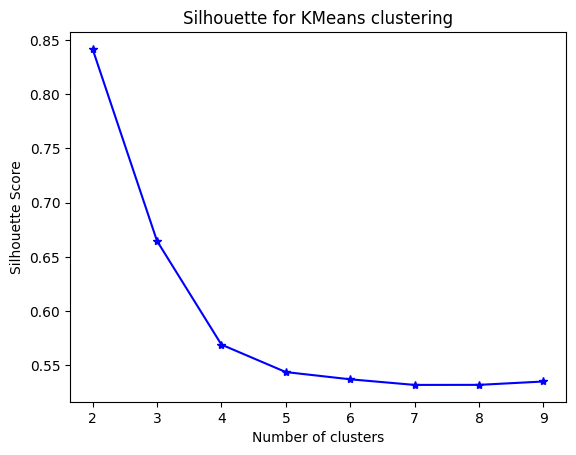

In [ ]:
plt.plot(range(2, 10), silhouette_pca, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for KMeans clustering')
plt.show()

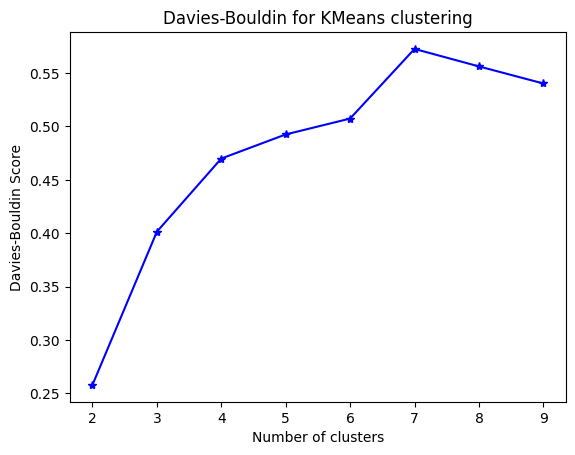

In [ ]:

plt.plot(range(2, 10), davies_bouldin_pca, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin for KMeans clustering')
plt.show()


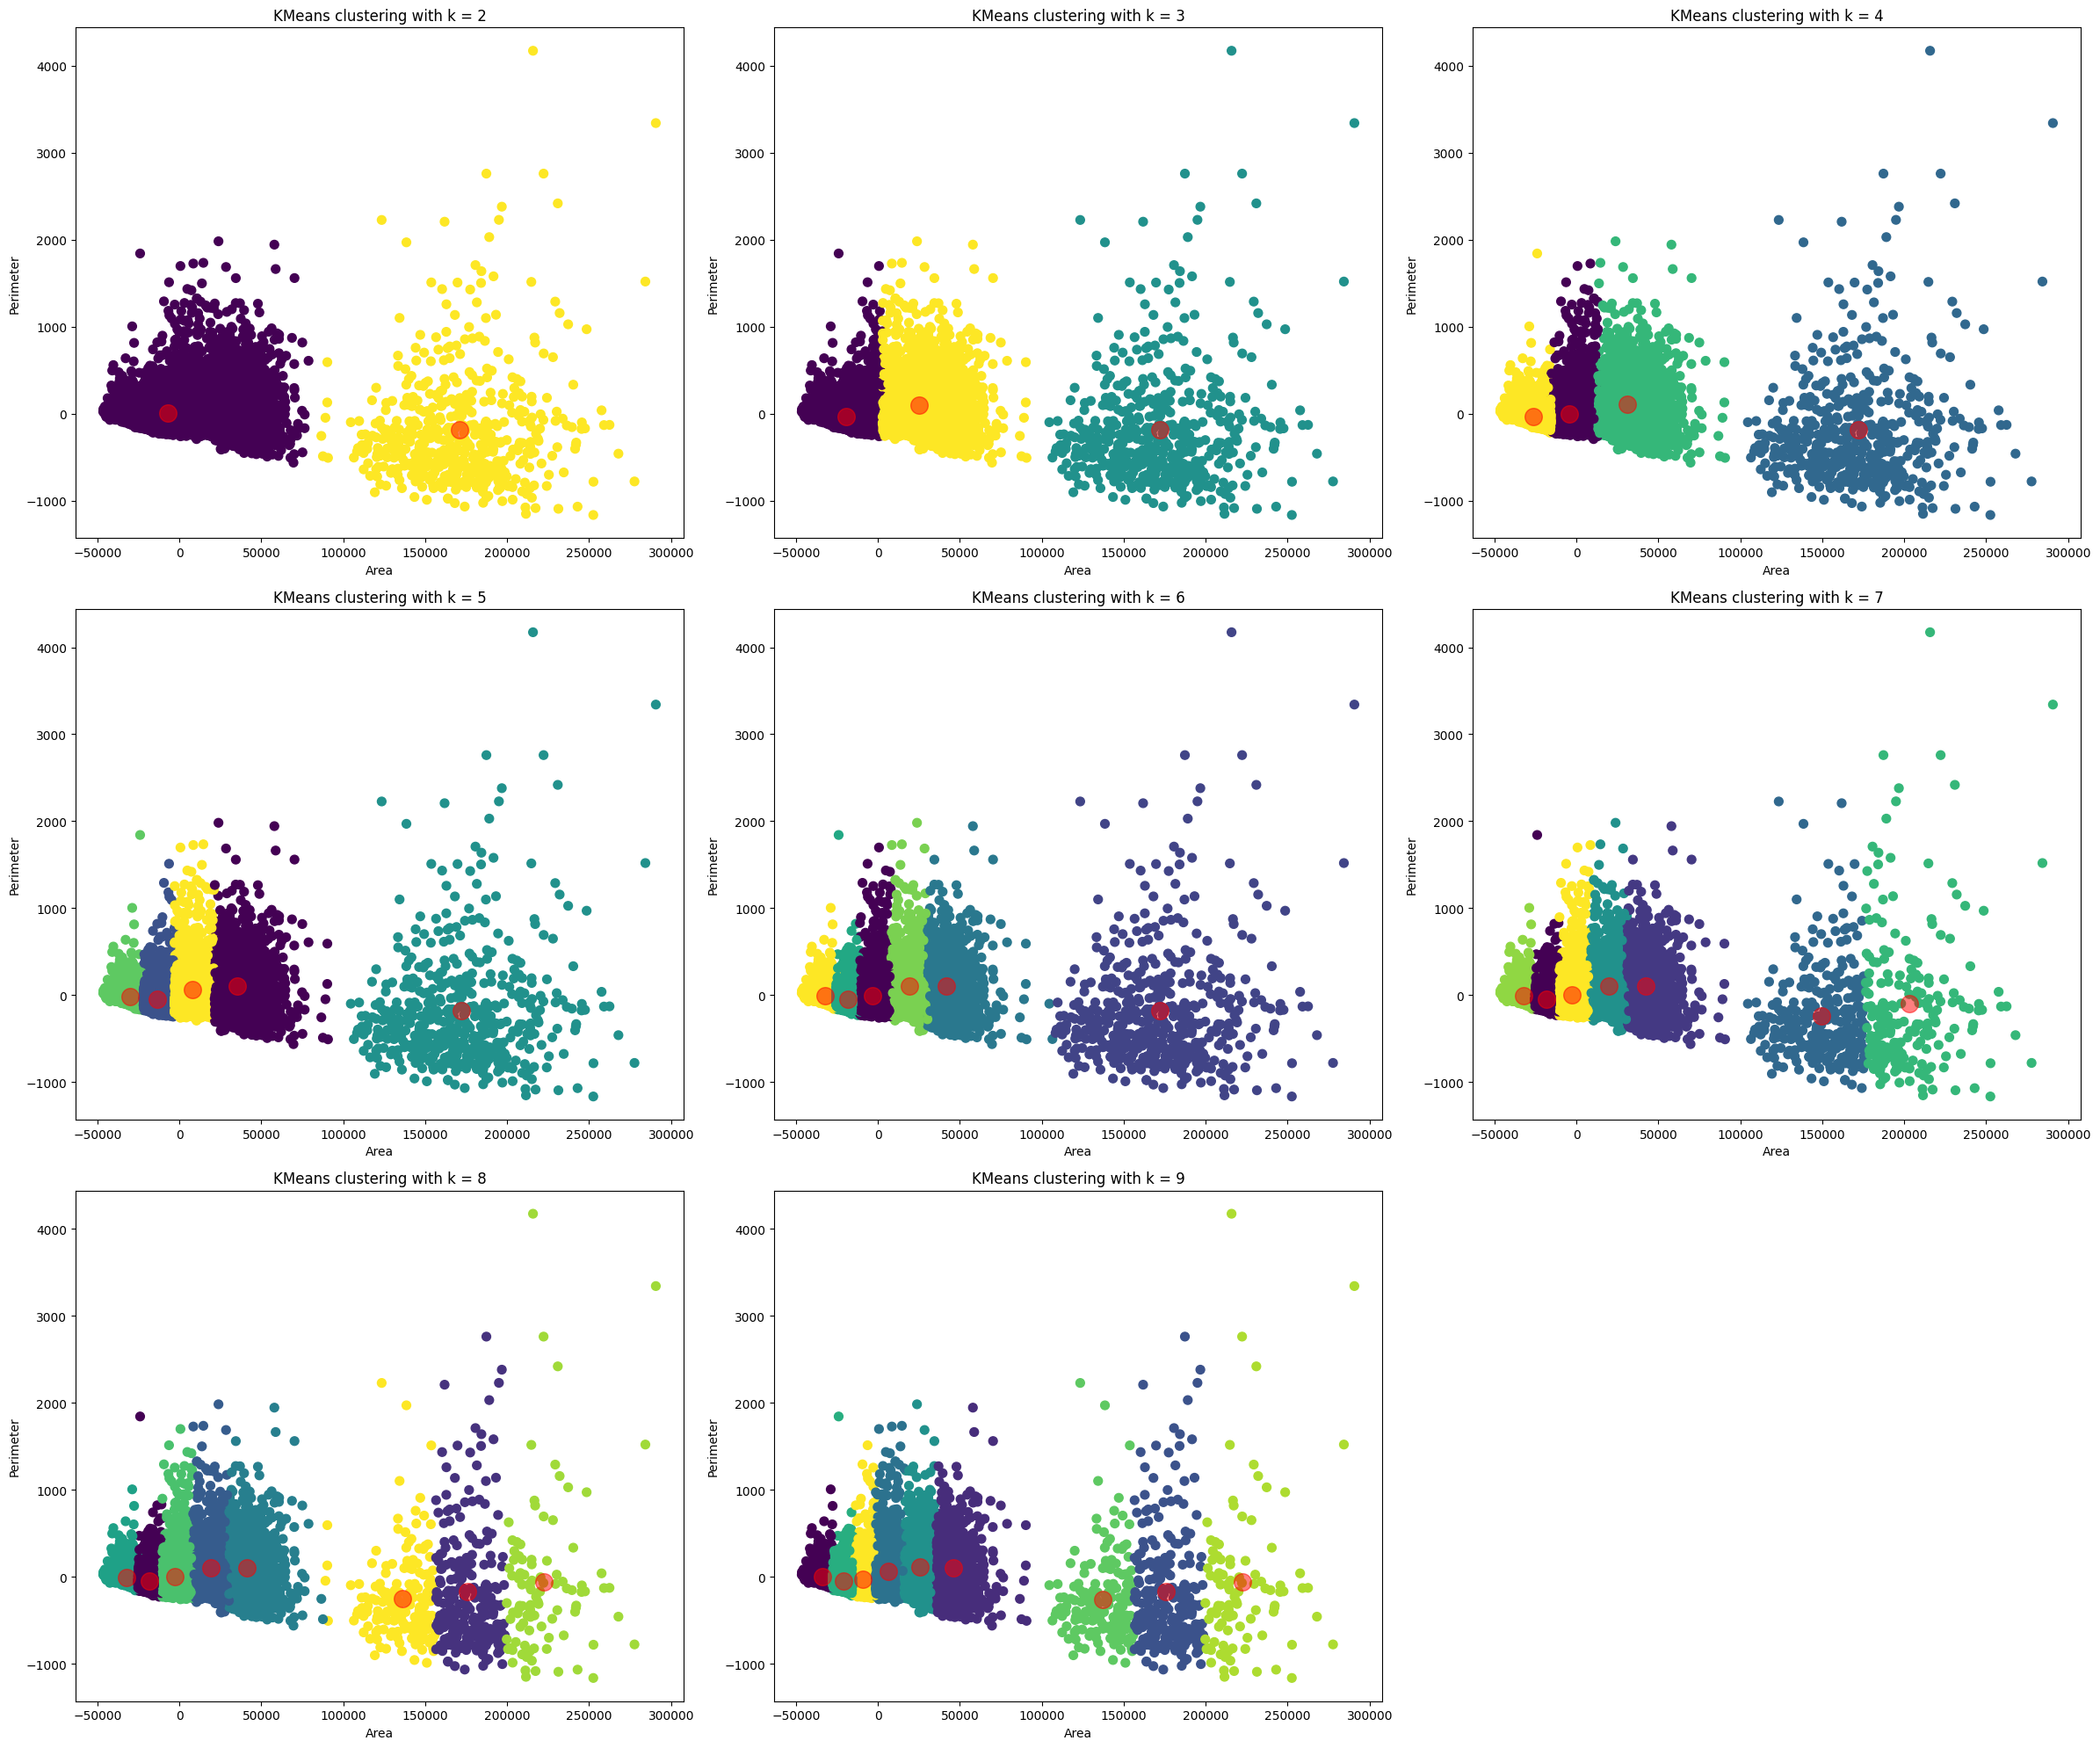

In [ ]:
plt.figure(figsize=((24, 20)))
for i in range(len(kmeans_pca)):
    plt.subplot(3, 3, i+1)
    plt.scatter(principalDf['PC1'], principalDf['PC2'], c=kmeans_pca[i].predict(principalDf), s=50, cmap='viridis')
    centers = kmeans_pca[i].cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.xlabel('Area')
    plt.ylabel('Perimeter')
    plt.title('KMeans clustering with k = ' + str(i+2))
    plt.tight_layout()
plt.show()